# 2. Correlación entre contaminantes

Usando el archivo generado en el notebook `01_concatenar_archivos.ipynb` se estructura primero el dataframe para correr la función de correlación en python y graficar la matriz correspondiente.

Después se construye una función que servirá para obtener la correlación con un desfase determinado de tiempo.

Dado que son necesarias las correlaciones del O3 y PM10 con los demás contaminantes, se crean nuevos dataframes que se guardarán en archivos csv correspondientes (para usarse en los modelos de predicción) y se graficaran las correlaciones correspondientes.

Se importan las bibliotecas necesarias.

In [1]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from pandas.plotting import scatter_matrix

Se carga el archivo generado anteriormente.

## Leamos los DF generados

Leemos los archivos por hora:

In [43]:
data_hora_10 = pd.read_csv('/home/paw/DanielBustillos/por_hora/cont_hora2010.csv')
data_hora_11 = pd.read_csv('/home/paw/DanielBustillos/por_hora/cont_hora2011.csv')
data_hora_12 = pd.read_csv('/home/paw/DanielBustillos/por_hora/cont_hora2012.csv')
data_hora_13 = pd.read_csv('/home/paw/DanielBustillos/por_hora/cont_hora2013.csv')
data_hora_14 = pd.read_csv('/home/paw/DanielBustillos/por_hora/cont_hora2014.csv')
data_hora_15 = pd.read_csv('/home/paw/DanielBustillos/por_hora/cont_hora2015.csv')
data_hora_16 = pd.read_csv('/home/paw/DanielBustillos/por_hora/cont_hora2016.csv')
data_hora_17 = pd.read_csv('/home/paw/DanielBustillos/por_hora/cont_hora2017.csv')
data_hora_18 = pd.read_csv('/home/paw/DanielBustillos/por_hora/cont_hora2018.csv')
data_hora_19 = pd.read_csv('/home/paw/DanielBustillos/por_hora/cont_hora2019.csv')

FileNotFoundError: File b'/home/paw/DanielBustillos/por_hora/cont_hora2010.csv' does not exist

In [44]:
data_hora = data_hora_19.append(data_hora_18, ignore_index=True,sort=True)
data_hora = data_hora.append(data_hora_17, ignore_index=True,sort=True)
data_hora = data_hora.append(data_hora_16, ignore_index=True,sort=True)
data_hora = data_hora.append(data_hora_15, ignore_index=True,sort=True)
data_hora = data_hora.append(data_hora_14, ignore_index=True,sort=True)
data_hora = data_hora.append(data_hora_13, ignore_index=True,sort=True)
data_hora = data_hora.append(data_hora_12, ignore_index=True,sort=True)
data_hora = data_hora.append(data_hora_11, ignore_index=True,sort=True)
data_hora = data_hora.append(data_hora_10, ignore_index=True,sort=True)

NameError: name 'data_hora_19' is not defined

In [45]:
data_hora['dia'] = data_hora['fecha'].astype(str).str[8:10]
data_hora['mes'] =  data_hora['fecha'].astype(str).str[5:7]
data_hora['fecha'] = data_hora['fecha'].astype(str).str[0:10]

NameError: name 'data_hora' is not defined

In [ ]:
data_hora = data_hora.drop(["Unnamed: 0"],axis=1)
data_hora = data_hora.drop_duplicates()
data_hora = data_hora[1::]

In [ ]:
data_hora = data_hora.drop(["PBa","PMCO","UVA","UVB"],axis=1)

In [ ]:
data_hora = data_hora.dropna() ##porque????

In [ ]:
data = data_hora.dropna(subset=['O3'])

In [ ]:
data_hora = data_hora[data_hora.fecha > "2015-01-01 23:00:00"]

In [ ]:
data.head()

Como se puede observar, se necesita reestructurar el dataframe para que se pueda correr la correlación. Es necesario quitar algunas columnas y reiniciar índices.


# Datos por día: mean(), max(), min()

### Creamos un Df con los datos promedio por hora oara rellenar los nan del DF original

In [11]:
data_hora.head()

,CO,NO,NO2,NOX,O3,PM10,PM2.5,RH,SO2,TMP,WDR,WSP,dia,fecha,hora,id_station,mes
12,1.1,8.0,36.0,45.0,2.0,96.0,74.0,59.0,3.0,11.4,111.0,1.3,01,2019-01-01,4,HGM,01
17,1.3,43.0,36.0,80.0,1.0,118.0,82.0,69.0,5.0,11.0,130.0,0.8,01,2019-01-01,4,MER,01
18,1.9,56.0,36.0,92.0,2.0,143.0,125.0,63.0,3.0,11.8,170.0,0.7,01,2019-01-01,4,MGH,01
26,1.2,41.0,30.0,71.0,1.0,80.0,59.0,66.0,3.0,9.8,249.0,0.7,01,2019-01-01,4,TLA,01
31,2.2,74.0,36.0,110.0,4.0,337.0,249.0,61.0,7.0,10.8,69.0,1.4,01,2019-01-01,4,XAL,01


 Create a datetime column

In [12]:
data_hora['fecha']  = pd.to_datetime([''.join([' '.join([data_hora.loc[i, 'fecha'], str(data_hora.loc[i, 'hora'])]),':00']) for i in data_hora.index])

Sort into proper order so that rolling() is computed correctly


In [13]:
data_24 = data_hora.sort_values(['id_station','fecha'])
# Set the datetime column as the dataframe index
data_24 = data_24.set_index('fecha')

In [14]:
data_24 = data_24.groupby('id_station')[["PM10","PM2.5"]].rolling(24).mean().dropna().reset_index()

In [15]:
data_24 = data_24.rename(columns={'PM10': 'PM10mean',"PM2.5":'PM25mean'})#, 'PM2.5': 'PM2.5_mean'})

## Groupbys

In [16]:
data_day = pd.merge(data_hora, data_24, on=["fecha","id_station"])

In [17]:
data_day = data_day[data_day.id_station!="PED"]
data_day = data_day[data_day.id_station!="PLA"]

In [18]:
data = data_day

## 2.2 Correlación entre contaminantes

Usando los datos anteriores ya podemos obtener la correlación y la matriz de correlación entre los contaminantes.

Se construye un filtro para que a demanda el usuario obtenga la correlación del contaminante deseado.

In [19]:
@interact
def correlaciones(X = list(data.select_dtypes('number').columns),
                  Y = list(data.select_dtypes('number').columns)):
        
    print(f"Correlación: {data[X].corr(data[Y])}")

Correlación: 1.0


Y se construye la matriz de correlación:

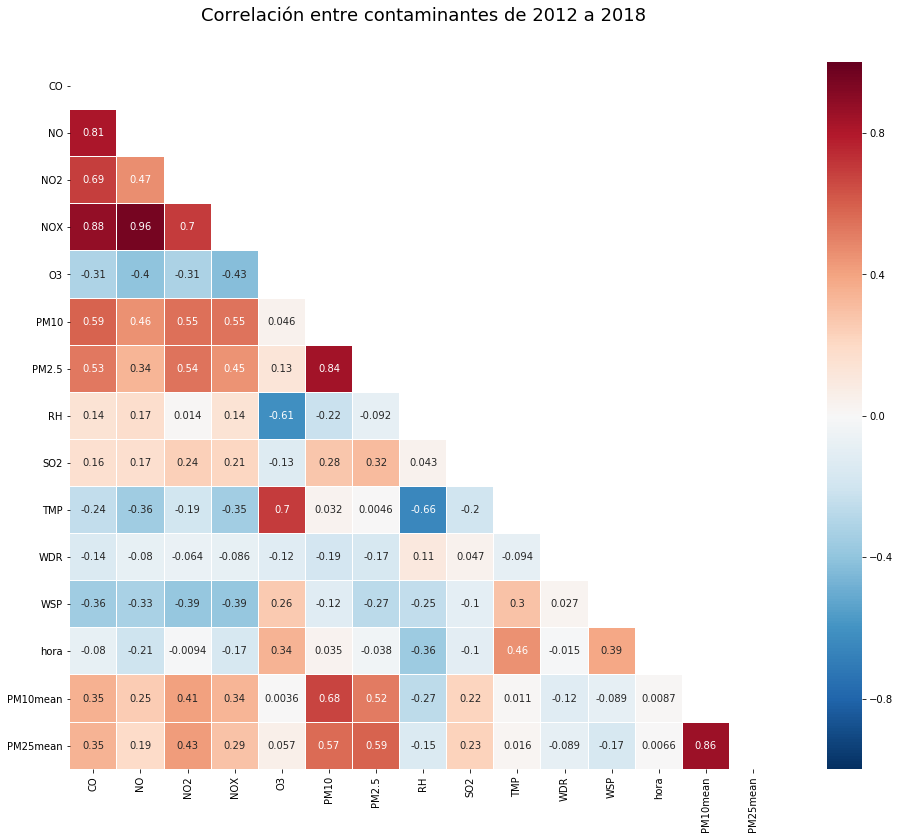

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
colormap = plt.cm.RdBu_r
plt.figure(figsize=(18,13))
plt.title(u'Correlación entre contaminantes de 2012 a 2018', y=1.05, size=18)

mask = np.zeros_like(data.corr())
mask[np.triu_indices_from(mask)] = True

svm = sns.heatmap(data.corr(), mask=mask, linewidths=0.1,vmin = -1.0, vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

También se puede graficar la distribución de los datos para visualizar la correlación.

## 2.3 Correlación cruzada entre contaminantes

Es necesario conocer la correlación entre los contaminantes a distintos rangos de tiempo. Por ejemplo, es de interés saber si las partículas PM10 aumentan o disminuyen 24 hrs después de que subió el O3 o algún otro contaminante. Para ello se construye una función que calcule la correlación desfasada cada hora.

Esta función fue obtenida en un artículo de kaggle titulado [Cross-correlation (time-lag) with pandas](https://www.kaggle.com/dedecu/cross-correlation-time-lag-with-pandas) y aplicada en este trabajo: 

In [21]:
def data_lag(df,lag=0,NON_DER=[]):
    df = df.copy()
    if not lag:
        return df
    cols ={}
    for i in range(1,lag+1):
        for x in list(df.columns):
            if x not in NON_DER:
                if not x in cols:
                    cols[x] = ['{}_{}'.format(x, i)]
                else:
                    cols[x].append('{}_{}'.format(x, i))
    for k,v in cols.items():
        columns = v
        dfn = pd.DataFrame(data=None, columns=columns, index=df.index)    
        i = 1
        for c in columns:
            dfn[c] = df[k].shift(periods=i)
            i+=1
        df = pd.concat([df, dfn], axis=1, join_axes=[df.index])
    return df

In [22]:
NON_DER = ['fecha']

El desfase se hará para 72 horas aplicando la función anterior a los datos que se tienen.

In [23]:
data_72 = data_lag(data, 72, NON_DER)

Se corre la correlación para este desfase y se guarda en un nuevo dataframe.

In [24]:
data_72_corr = data_72.corr()

La tabla obtenida tiene todos los valores desfasados hasta 72 horas. Por ejemplo la columna indicada como PM10_63 muestra la correlación de todos los contaminantes con diferencia de 63 horas.

Guardamos el archivo para no tener que correlo de nuevo:

In [2]:
data_72_corr = pd.read_csv("./correlaciones.csv", sep=',', encoding='utf-8')

In [4]:
data_72_corr.head(5)

,Unnamed: 0,CO,NO,NO2,NOX,O3,PM10,PM2.5,RH,SO2,...,PM25mean_63,PM25mean_64,PM25mean_65,PM25mean_66,PM25mean_67,PM25mean_68,PM25mean_69,PM25mean_70,PM25mean_71,PM25mean_72
0,CO,1.000000,0.813557,0.688798,0.880467,-0.306527,0.587596,0.529662,0.143068,0.163083,...,0.112754,0.110834,0.105011,0.108508,0.105330,0.104041,0.104442,0.106398,0.097639,0.105089
1,NO,0.813557,1.000000,0.465677,0.957102,-0.403044,0.455552,0.337972,0.174219,0.169990,...,0.026313,0.024991,0.022289,0.025143,0.023490,0.023540,0.022512,0.025289,0.018986,0.025662
2,NO2,0.688798,0.465677,1.000000,0.701875,-0.312554,0.550676,0.544887,0.014228,0.237594,...,0.164600,0.158020,0.156191,0.159353,0.150545,0.153442,0.151799,0.151436,0.143041,0.152402
3,NOX,0.880467,0.957102,0.701875,1.000000,-0.426652,0.546678,0.450307,0.144873,0.214605,...,0.075186,0.071930,0.069155,0.072514,0.068312,0.069293,0.067917,0.070026,0.062207,0.070631
4,O3,-0.306527,-0.403044,-0.312554,-0.426652,1.000000,0.045757,0.127166,-0.612902,-0.126399,...,0.067931,0.067888,0.070130,0.066236,0.066318,0.064542,0.063120,0.061202,0.066356,0.058275


In [5]:
data_72_corr.set_index('Unnamed: 0', inplace=True)

### 2.3.1 Correlación entre PM10 y los demás contaminantes

Siendo las partículas PM10 uno de los determinantes para detonar una contingencia ambiental, interesa saber de que manera se correlacionan con los demás contaminantes y en que ciclos de tiempo dicha correlación es más fuerte.

Se graficará esta correlación para el rango de 0 a 72 horas obtenido en la sección anterior.

Antes de correr la correlación se le vuelve a dar estructura al dataframe para poder graficar de manera óptima.

In [6]:
# Se aísla sólo la columna que corresponde a las partículas PM10
PM10_72 = data_72_corr[["O3"]]

In [7]:
# Se reinicia el índice del dataframe
PM10_72.reset_index(inplace=True)

In [8]:
# Se renombran las columnas para mayor comprensión
PM10_72.columns = ['contaminante', 'valor']

El dataframe tendrá la siguiente estructura:

In [9]:
PM10_72.head()

,contaminante,valor
0,CO,-0.306527
1,NO,-0.403044
2,NO2,-0.312554
3,NOX,-0.426652
4,O3,1.000000


In [10]:
PM10_72['horas'] = PM10_72['contaminante'].str.split('_').str[1]
PM10_72['contaminante'] = PM10_72['contaminante'].str.split('_').str[0]
PM10_72.fillna(0,inplace=True)

In [11]:
PM10_72.reset_index(inplace=True,drop=True)

In [12]:
PM10_72.head(10)

,contaminante,valor,horas
0,CO,-0.306527,0
1,NO,-0.403044,0
2,NO2,-0.312554,0
3,NOX,-0.426652,0
4,O3,1.000000,0
5,PM10,0.045757,0
6,PM2.5,0.127166,0
7,RH,-0.612902,0
8,SO2,-0.126399,0
9,TMP,0.701448,0


Filtramos para obtener los valores con corr>0.15

In [56]:
PM10_72 = PM10_72[(PM10_72.valor>0.15) | (PM10_72.valor<-0.15)] #pm25

In [57]:
PM10_72.to_csv("./O3_corr.csv", sep=',', encoding='utf-8')